# Esercizio 1

È noto che il numero di pezzi guasti fabbricati in una giornata di lavoro di una catena di produzione A segue una distribuzione di Poisson di media 2.

1. Qual è la probabilità che in un giorno siano stati prodotti esattamente 3 pezzi guasti?
2. Qual è la probabilità che in un giorno siano stati prodotti tra 2 e 5 pezzi guasti (estremi inclusi)?

Si mette in opera una nuova catena di produzione B. È noto che il numero di pezzi guasti fabbricati in una giornata di lavoro mediante B segue una distribuzione di Poisson di media 1.5.

3. Si trovi la legge della variabile aleatoria che conta complessivamente il numero di pezzi guasti prodotti (cioè provenienti indifferentemente da A o da B) e si calcoli la sua media e la sua varianza.
4. Qual è la probabilità che in un giorno siano stati prodotti complessivamente un numero di pezzi guasti compreso tra 3 e 6 (estremi inclusi)?

In [2]:
import numpy as np
from scipy.stats import poisson

lam = 2

# Punto 1

punto1 = poisson.pmf(3, lam)
print("Probabilità di trovare 3 pezzi guasti: ", punto1)

# Punto 2

punto2 = (
    poisson.pmf(2, lam)
    + poisson.pmf(3, lam)
    + poisson.pmf(4, lam)
    + poisson.pmf(5, lam)
)

"""
for i in range(2,6):
    punto2 += poisson.pmf(i,lam)
"""

print(punto2)

# Punto 3

mu = 1.5

# lam>0 e mu>0 -> X+Y Poisson(lam+mu)
# quindi la nuova v.a. sarà Z Poisson (4.5)
# la cui media e varianza sarà uguale a 4.5

# Punto 4

punto4 = 0
"""
for i in range(3, 7):
    punto4 += poisson.pmf(i, lam + mu)
print(punto4)
"""

punto4 = 0
punto4 = (
    poisson.pmf(3, lam + mu)
    + poisson.pmf(4, lam + mu)
    + poisson.pmf(5, lam + mu)
    + poisson.pmf(6, lam + mu)
)
print(punto4)

Probabilità di trovare 3 pezzi guasti:  0.18044704431548356
0.5774305418095474
0.6138647041089124


# Esercizio 2

Il contenuto di sodio (in milligrammi) di 30 scatole di cereali è riportato di seguito:

131.15, 130.69, 130.91, 129.54, 129.64, 128.77, 130.72, 128.33, 128.24, 129.65, 130.14, 129.29, 128.71, 129.00, 129.39, 130.42, 129.53, 130.12, 129.78, 130.92, 131.15, 130.69, 130.91, 129.54, 129.64, 128.77, 130.72, 128.33, 128.24, 129.65.

1. Si calcoli la media campionaria, la deviazione standard e l’intervallo di confidenza per la media con livello di fiducia 0.01.
2. Rappresentare graficamente i dati mediante un istogramma e mediante un box-plot.
3. Si testi l’ipotesi che il contenuto medio di sodio sia di 130 mg utilizzando \( \alpha = 0.05 \). Si calcoli il p-value del test precedente.
4. È possibile affermare che il contenuto di sodio è distribuito normalmente nelle scatole? Giustificare la risposta.

In [3]:
import numpy as np
from scipy.stats import norm

A = np.array(
    [
        131.15,
        130.69,
        130.91,
        129.54,
        129.64,
        128.77,
        130.72,
        128.33,
        128.24,
        129.65,
        130.14,
        129.29,
        128.71,
        129.00,
        129.39,
        130.42,
        129.53,
        130.12,
        129.78,
        130.92,
        131.15,
        130.69,
        130.91,
        129.54,
        129.64,
        128.77,
        130.72,
        128.33,
        128.24,
        129.65,
    ]
)
n = A.size
# Punto 1
media = np.mean(A)
deviazione_standard = np.std(A, ddof=1)
alpha = 0.01
PHI = norm.ppf(1 - alpha / 2)

il = media - ((deviazione_standard / np.sqrt(n)) * PHI)
ir = media + ((deviazione_standard / np.sqrt(n)) * PHI)
print(il)
print(ir)

129.31560733504844
130.18972599828484


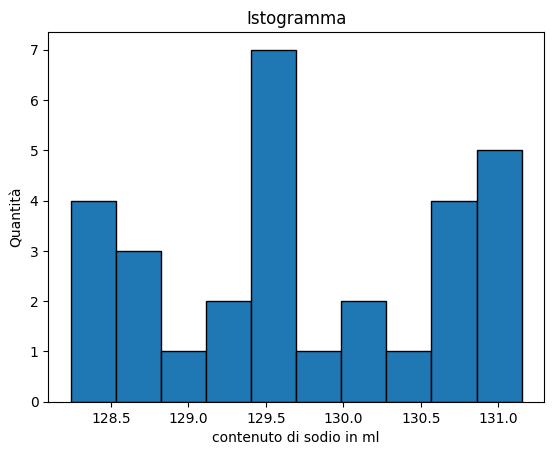

In [4]:
# Punto 2
import matplotlib.pyplot as plt

plt.hist(A, bins=10, edgecolor="black")
plt.xlabel("contenuto di sodio in ml")
plt.ylabel("Quantità")
plt.title("Istogramma")
plt.show()

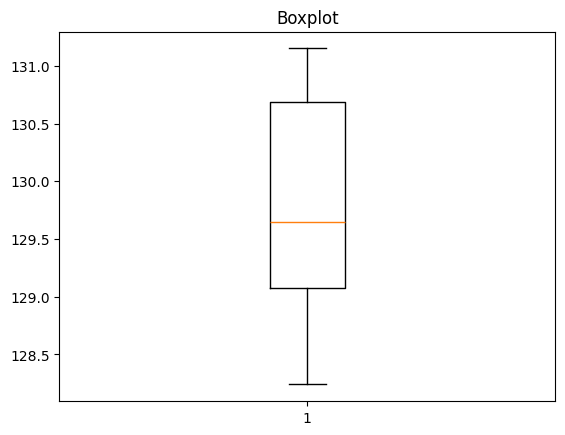

In [5]:
import matplotlib.pyplot as plt

plt.boxplot(A)
plt.title("Boxplot")
plt.show()

In [6]:
from scipy.stats import t

# Punto 3
alpha = 0.05
mu = 130
T = ((media - mu) / deviazione_standard) * np.sqrt(n)
t = t.ppf(1 - alpha / 2, n - 1)
print("T0: ", np.abs(T))
print("t: ", t)

print("T0 < t: Non si può rigettare l'ipotesi")

T0:  1.4576703931379382
t:  2.045229642132703
T0 < t: Non si può rigettare l'ipotesi


In [7]:
from scipy.stats import t

# p-value
p_value = 2 * (1 - t.cdf(T, n - 1))
print("p-value: ", p_value)

p-value:  1.844323633977642


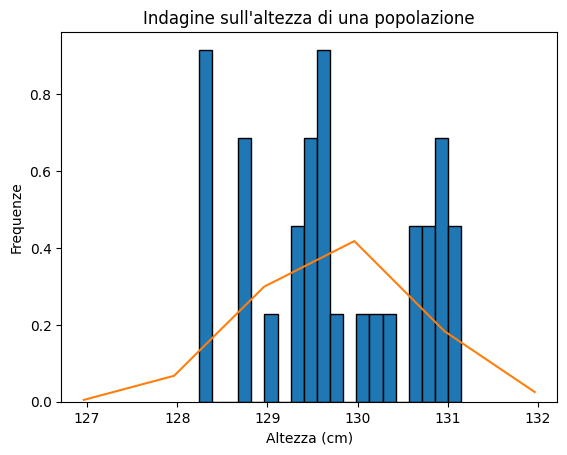

In [8]:
# Punto 4
from scipy.stats import norm

assex = np.arange(media - (3 * deviazione_standard), media + (3 * deviazione_standard))
assey = norm.pdf(assex, media, deviazione_standard)

plt.hist(A, 20, edgecolor="black", density="True")
plt.plot(assex, assey)

plt.title("Indagine sull'altezza di una popolazione")
plt.xlabel("Altezza (cm)")
plt.ylabel("Frequenze")

plt.show()

# Non segue una normale

# Esercizio 3

Si consideri la catena di Markov sui vertici di un triangolo equilatero definita come segue. Ad ogni istante ci si può spostare da un vertice a quello adiacente in senso orario con probabilità \( p \) e in senso antiorario con probabilità 1 - p , con  0 < p < 1 .

1. Determinare la matrice di transizione.
2. Fissato p=1/3, mostrare che la catena è regolare.
3. Fissato p=1/3, determinare la distribuzione stazionaria.
4. Indicato con  E = {1, 2, 3}  l'insieme degli stati, determinare il valore di  p  per cui la distribuzione uniforme su E  sia reversibile.

In [9]:
# Punto 1 Questa è la matrice di transizione
# [0 p 1-p]
# [1-p 0 p]
# [p 1-p 0]

In [10]:
import numpy as np
M = np.array([[0,1/3,2/3],[2/3,0,1/3],[1/3,2/3,0]])
print(np.dot(M,M))
#Sono tutti positivi quindi è regolare

[[0.44444444 0.44444444 0.11111111]
 [0.11111111 0.44444444 0.44444444]
 [0.44444444 0.11111111 0.44444444]]


In [11]:
#Punto 3
#primo metodo
lam, V = np.linalg.eig(M.T)
v = np.real(V[:, 0]) / np.sum(np.real(V[:, 0]))
print(v)

[0.33333333 0.33333333 0.33333333]


In [12]:
#secondo metodo
import numpy as np
n=3
F=np.zeros(n)
j=np.random.randint(n)
F[j]=1
N=100000
for i in range(N):
        j_multi=np.random.multinomial(1,M[j,:])
        j=np.nonzero(j_multi)[0][0]
        F[j]=F[j]+1

vv=F/N
print(vv)

[0.33313 0.33375 0.33313]


In [13]:
#Punto 4
import numpy as np

# Definisci la tua matrice di transizione in funzione di p
def M(p):
    return np.array([[0, p, 1-p], [1-p, 0, p], [p, 1-p, 0]])

# Per una catena di Markov con un insieme di stati E = {1, 2, 3},
# la distribuzione uniforme su E è π = (1/3, 1/3, 1/3).
# La distribuzione π è reversibile per la catena di Markov se e solo se
# πi Pij = πj Pji per ogni coppia di stati i, j in E.
# Sostituendo π e P in questa equazione otteniamo 1/3 Pij = 1/3 Pji,
# da cui segue che Pij = Pji per ogni coppia di stati i, j in E.
# Quindi, la distribuzione uniforme su E è reversibile per la catena di Markov
# se e solo se la matrice di transizione P è simmetrica.

# Dato che la matrice di transizione P è definita in termini di p,
# possiamo risolvere l'equazione Pij = Pji per p per trovare il valore di p
# per cui la matrice di transizione P è simmetrica.
# In particolare, abbiamo p = P12 = P21 = 1 - P13 = 1 - P31 = P23 = P32 = 1 - p.

# Risolvendo queste equazioni per p otteniamo p = 1/2.
# Quindi, la distribuzione uniforme su E è reversibile per la catena di Markov
# se e solo se p = 1/2.

# Ricorda che questa soluzione è valida solo se 0 < p < 1,
# come specificato nel problema.
# Se p = 1/2 non soddisfa questa condizione,
# allora non esiste un valore di p per cui la distribuzione uniforme su E
# sia reversibile per la catena di Markov.